In [1]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [32]:
import os

In [31]:
import arcpy

In [30]:
path = r'T:\Trans Projects\Model Development\UrbanSim_LandUse\Output\Simulation_47_Final_RTP'

In [23]:
arcpy.env.workspace = r'T:\Models\StoryMap\UrbanSim\UrbanSim.gdb'

In [33]:
arcpy.env.overwriteOutput = True

In [93]:
newDev = gpd.read_file(os.path.join(path, 'new_developments.shp'))

In [58]:
newDev.head()

,btype,nsqft,rsqft,du,yrbuilt,lpid,pundev,dev_land,orsqft,onrsqft,odu,dua,nrfar,ndu,nnsqft,geometry
0,1110,0.0,2936.0,1,2031,24636,14.0,5.328463e+06,0.0,0.0,0.0,0.008175,0.0,1,0.0,"POLYGON ((4253853.761 848765.083, 4253810.813 ..."
1,1110,0.0,38182.0,13,2032,24708,0.0,2.143960e+06,2041.0,0.0,1.0,0.264128,0.0,12,0.0,"POLYGON ((4250112.863 849539.515, 4250261.656 ..."
2,1110,0.0,24384.0,8,2034,24796,0.0,1.369197e+06,3498.0,0.0,1.0,0.254514,0.0,7,0.0,"POLYGON ((4248043.221 850118.769, 4248037.169 ..."
3,1110,0.0,11762.0,4,2037,24890,9.0,2.134994e+06,2150.0,0.0,1.0,0.081611,0.0,3,0.0,"POLYGON ((4257174.792 850971.558, 4257157.732 ..."
4,1110,0.0,4829.0,2,2029,25049,0.0,8.765263e+05,0.0,0.0,0.0,0.099392,0.0,2,0.0,"POLYGON ((4253304.256 852057.125, 4254563.690 ..."


In [63]:
list(newDev.columns)

['btype',
 'nsqft',
 'rsqft',
 'du',
 'yrbuilt',
 'lpid',
 'pundev',
 'dev_land',
 'orsqft',
 'onrsqft',
 'odu',
 'dua',
 'nrfar',
 'ndu',
 'nnsqft',
 'geometry']

In [12]:
newDev['yrbuilt'].min(), newDev['yrbuilt'].max()

(2021, 2045)

In [5]:
yrbuilt = 2021

In [59]:
yrsbuilt = range(newDev['yrbuilt'].min(), newDev['yrbuilt'].max()+1, 5)

In [62]:
[x for x in range(2021, 2046, 5)]

[2021, 2026, 2031, 2036, 2041]

In [126]:
for yrbuilt in range(2021, 2046, 5):
    newDevAnn = newDev[newDev['yrbuilt'] == yrbuilt]
    newDevAnn.to_file(os.path.join(path, 'output', 'newDevAnn'+ str(yrbuilt) +'.shp'))
    print("Exported " + str(yrbuilt) + "...")

Exported 2021...
Exported 2026...
Exported 2031...
Exported 2036...
Exported 2041...


In [127]:
field = 'du'
field_setup = 'du "du"'

In [16]:
arcpy.SpatialJoin_analysis(target_features=r"V:\Data\Transportation\MTAZ16.shp", 
                           join_features=os.path.join(path, 'output', 'newDevAnn'+ str(yrbuilt) +'.shp'), 
                           out_feature_class="newDev_taz_"+str(yrbuilt), 
                           join_operation="JOIN_ONE_TO_ONE", join_type="KEEP_COMMON", 
                           field_mapping='TAZ_NUM "TAZ_NUM" true true false 10 Long 0 10 ,First,#,MTAZ16,TAZ_NUM,-1,-1;Shape_Area "Shape_Area" true true false 19 Double 0 0 ,First,#,MTAZ16,Shape_Area,-1,-1;'+
                           field_setup +' true true false 18 Double 0 18 ,Sum,#,newDevAnn,'+ field +',-1,-1;yrbuilt "yrbuilt" true true false 18 Double 0 18 ,First,#,newDevAnn,yrbuilt,-1,-1', 
                           match_option="CONTAINS", search_radius="", distance_field_name="")

<Result 'T:\\Models\\StoryMap\\UrbanSim\\UrbanSim.gdb\\newDev_taz_2021'>

In [36]:
for yrbuilt in range(2021, 2046, 5):
    arcpy.SpatialJoin_analysis(target_features=r"V:\Data\Transportation\MTAZ16.shp", 
                           join_features=os.path.join(path, 'output', 'newDevAnn'+ str(yrbuilt) +'.shp'), 
                           out_feature_class="newDev_taz_"+str(yrbuilt), 
                           join_operation="JOIN_ONE_TO_ONE", 
                           join_type="KEEP_COMMON", 
                           field_mapping="""TAZ_NUM "TAZ_NUM" true true false 10 Long 0 10 ,First,#,MTAZ16,TAZ_NUM,-1,-1;
                           btype "btype" true true false 18 Double 0 18 ,Mode,#,newDevAnn,btype,-1,-1;
                           nsqft "nsqft" true true false 24 Double 15 23 ,Sum,#,newDevAnn,nsqft,-1,-1;
                           rsqft "rsqft" true true false 24 Double 15 23 ,Sum,#,newDevAnn,rsqft,-1,-1;
                           du "du" true true false 18 Double 0 18 ,Sum,#,newDevAnn,du,-1,-1;
                           yrbuilt "yrbuilt" true true false 18 Double 0 18 ,First,#,newDevAnn,yrbuilt,-1,-1;
                           pundev "pundev" true true false 24 Double 15 23 ,Sum,#,newDevAnn,pundev,-1,-1;
                           dev_land "dev_land" true true false 24 Double 15 23 ,Sum,#,newDevAnn,dev_land,-1,-1;
                           orsqft "orsqft" true true false 24 Double 15 23 ,Sum,#,newDevAnn,orsqft,-1,-1;
                           onrsqft "onrsqft" true true false 24 Double 15 23 ,Sum,#,newDevAnn,onrsqft,-1,-1;
                           odu "odu" true true false 24 Double 15 23 ,Sum,#,newDevAnn,odu,-1,-1;
                           ndu "ndu" true true false 5 Long 0 5 ,Sum,#,newDevAnn,ndu,-1,-1;
                           nnsqft "nnsqft" true true false 19 Double 0 0 ,Sum,#,newDevAnn,nnsqft,-1,-1""", 
                           match_option="CONTAINS", search_radius="", distance_field_name="")
    print("Processed " + str(yrbuilt) + "...")

Processed 2021...
Processed 2026...
Processed 2031...
Processed 2036...
Processed 2041...


In [37]:
for yrbuilt in range(2021, 2046, 5):
    arcpy.conversion.FeatureClassToShapefile("newDev_taz_" + str(yrbuilt), os.path.join(path, "output"))
    print("Processed " + str(yrbuilt) + "...")

Processed 2021...
Processed 2026...
Processed 2031...
Processed 2036...
Processed 2041...


In [94]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [95]:
outpath = r'T:\Models\StoryMap\UrbanSim'

In [103]:
#fieldName = 'New Dwelling Units'
fieldName = 'New Non-res SQFT'
#legendLabel = 'Dwelling Units'

In [102]:
#field = 'ndu'
field = 'nnsqft'

In [104]:
#outnm = 'du'
outnm = 'nsqft'

In [108]:
newDev['nnsqft'].min(), newDev['nnsqft'].max()

(-461328.0, 1037863.0)

<AxesSubplot:ylabel='Frequency'>

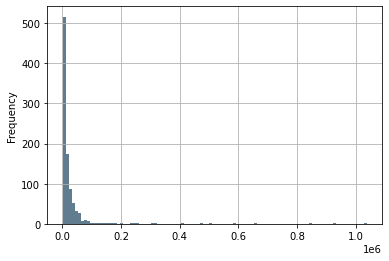

In [119]:
newDev[newDev['nnsqft'] > 0]['nnsqft'].plot.hist(grid=True, bins=100, rwidth=1.2, color='#607c8e')

In [124]:
#bins = [5,10,15,30]
bins = [5600, 11000, 18000, 41000]

Saved image for 2021...
Saved image for 2026...
Saved image for 2031...
Saved image for 2036...
Saved image for 2041...


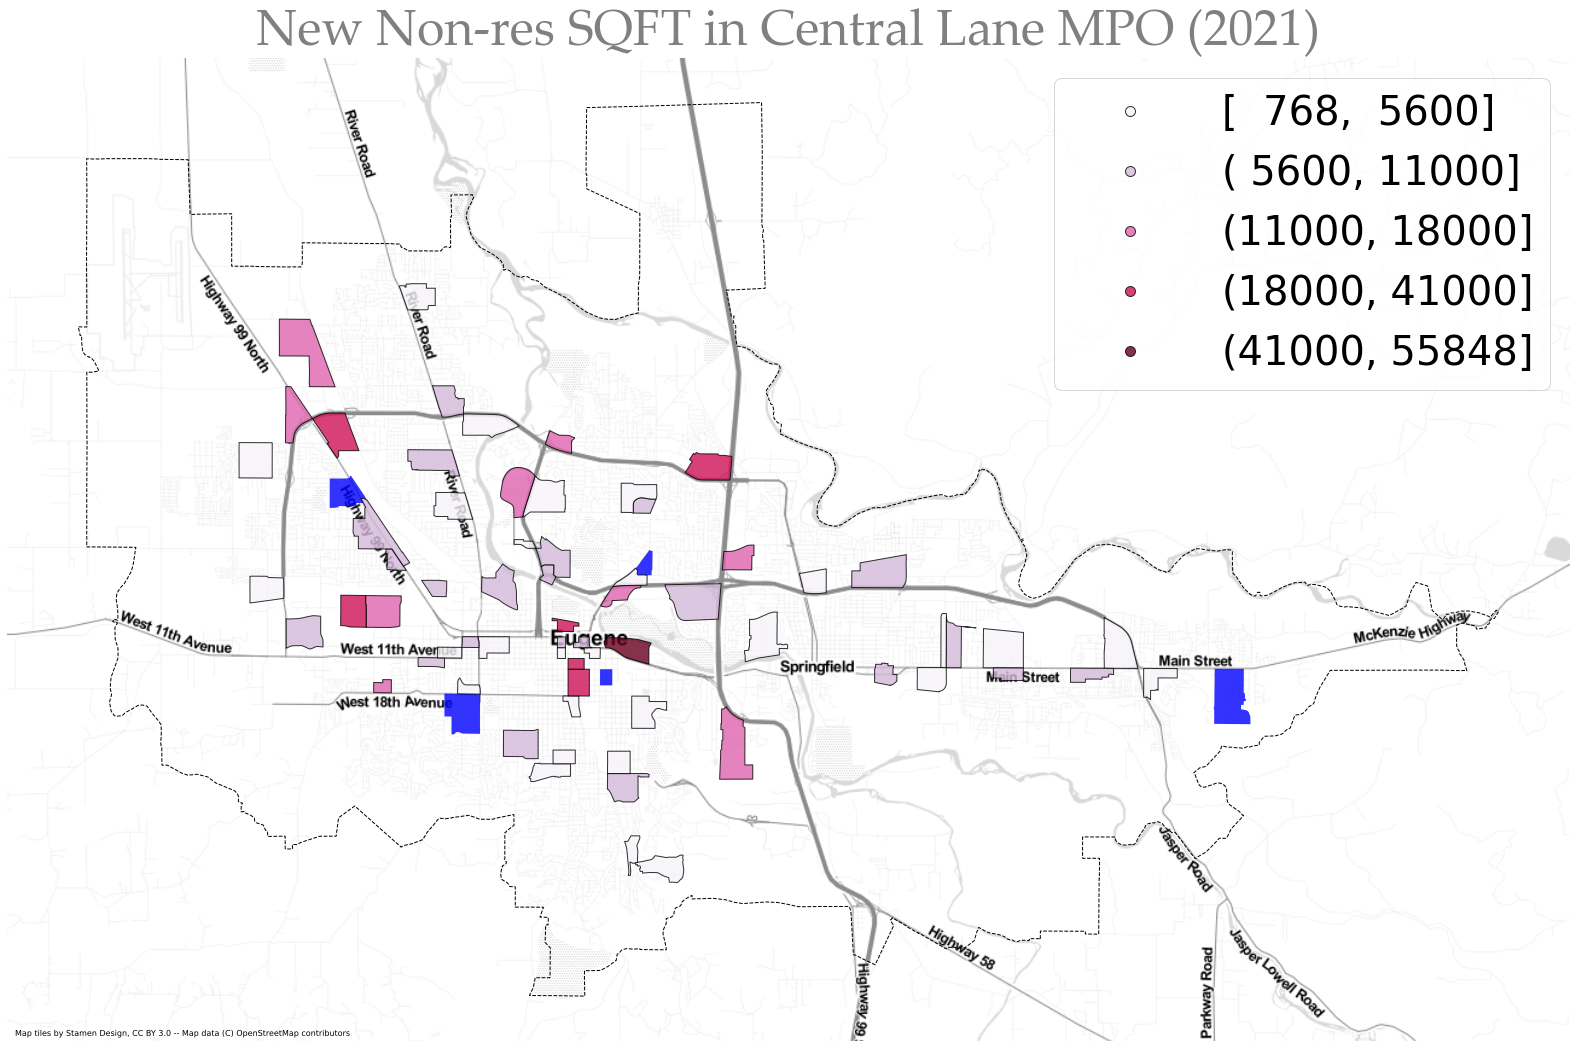

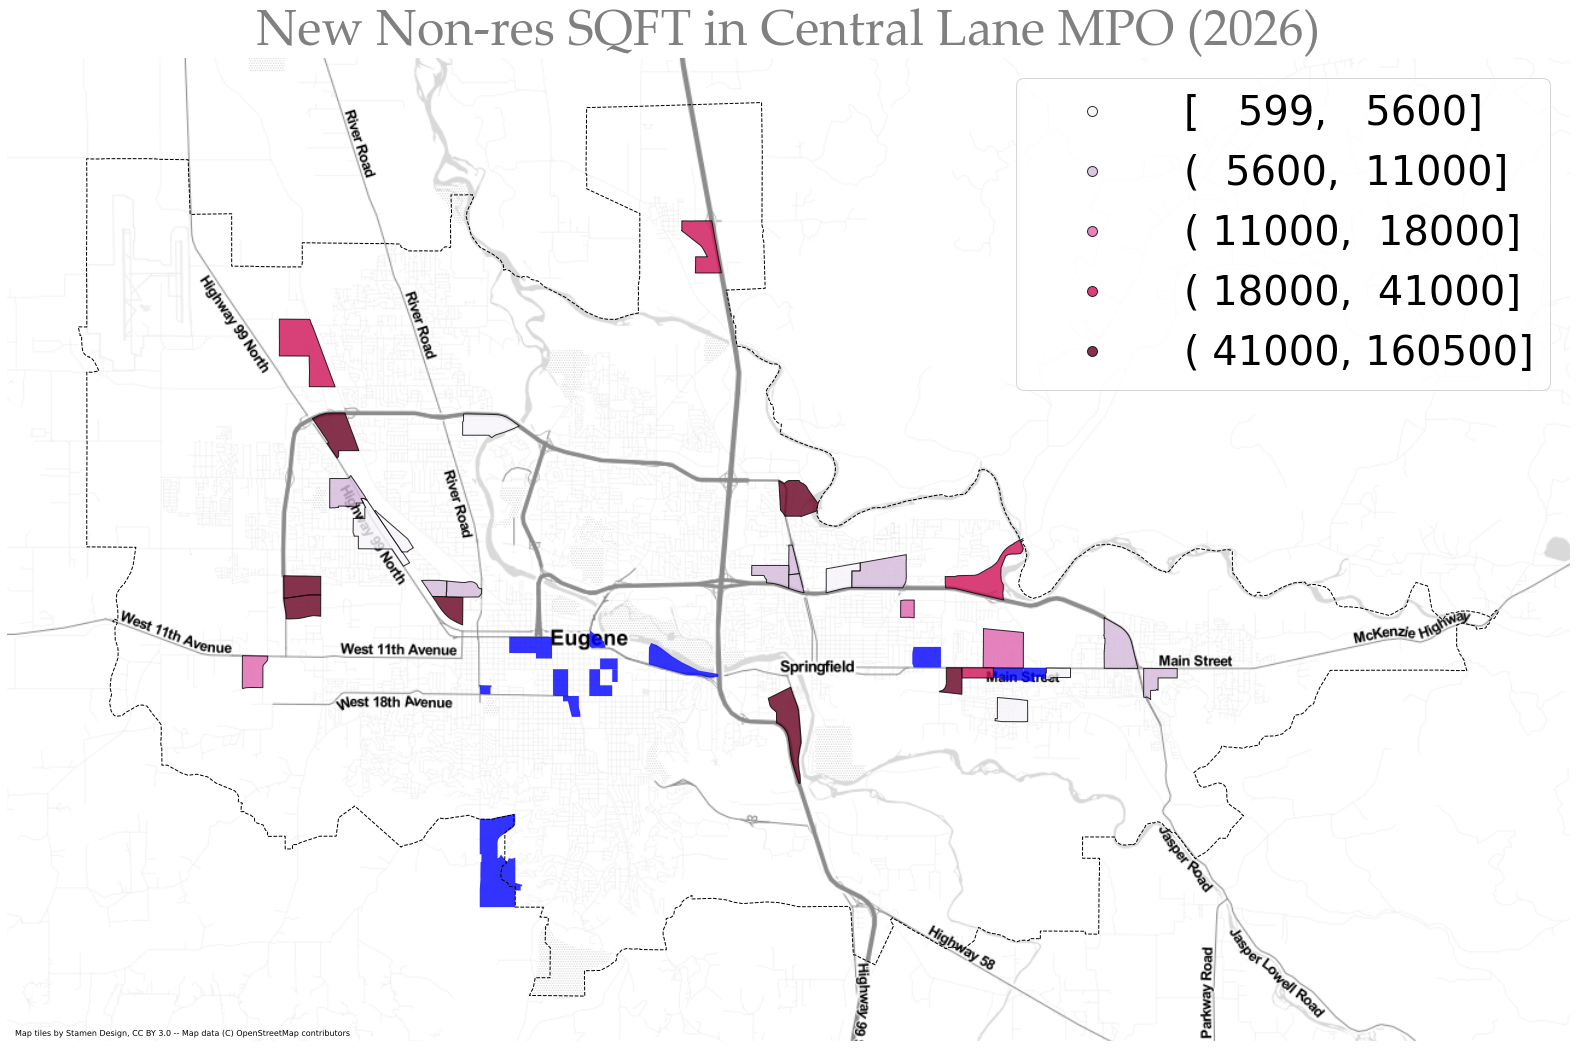

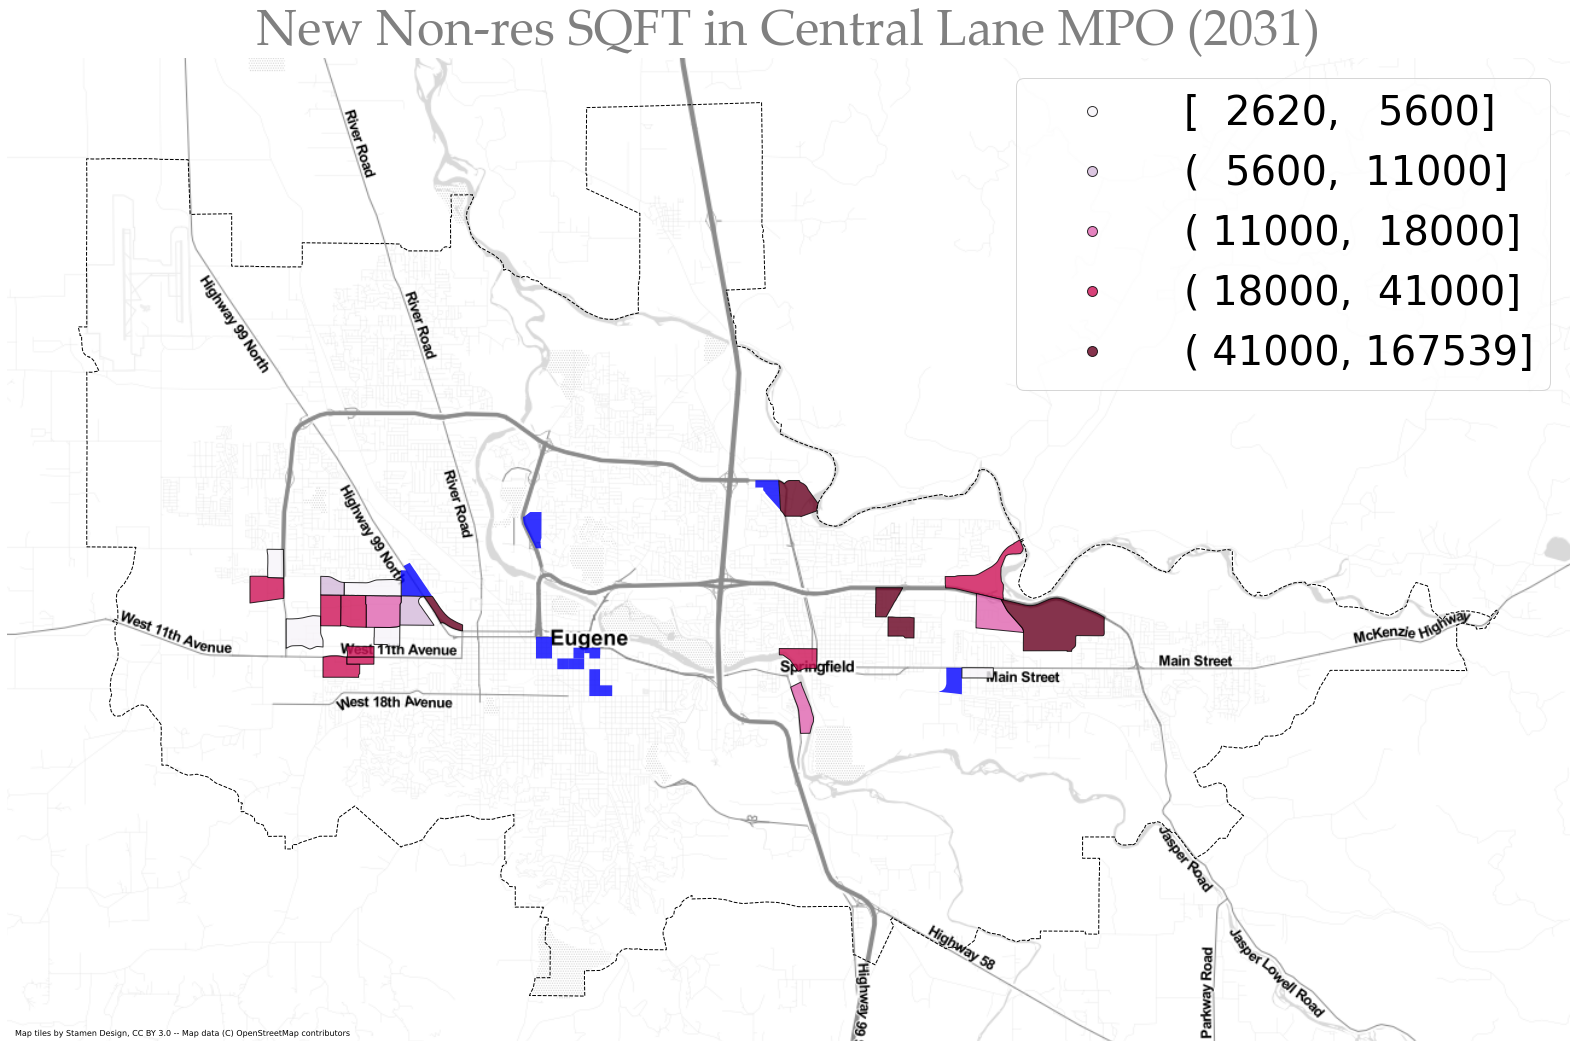

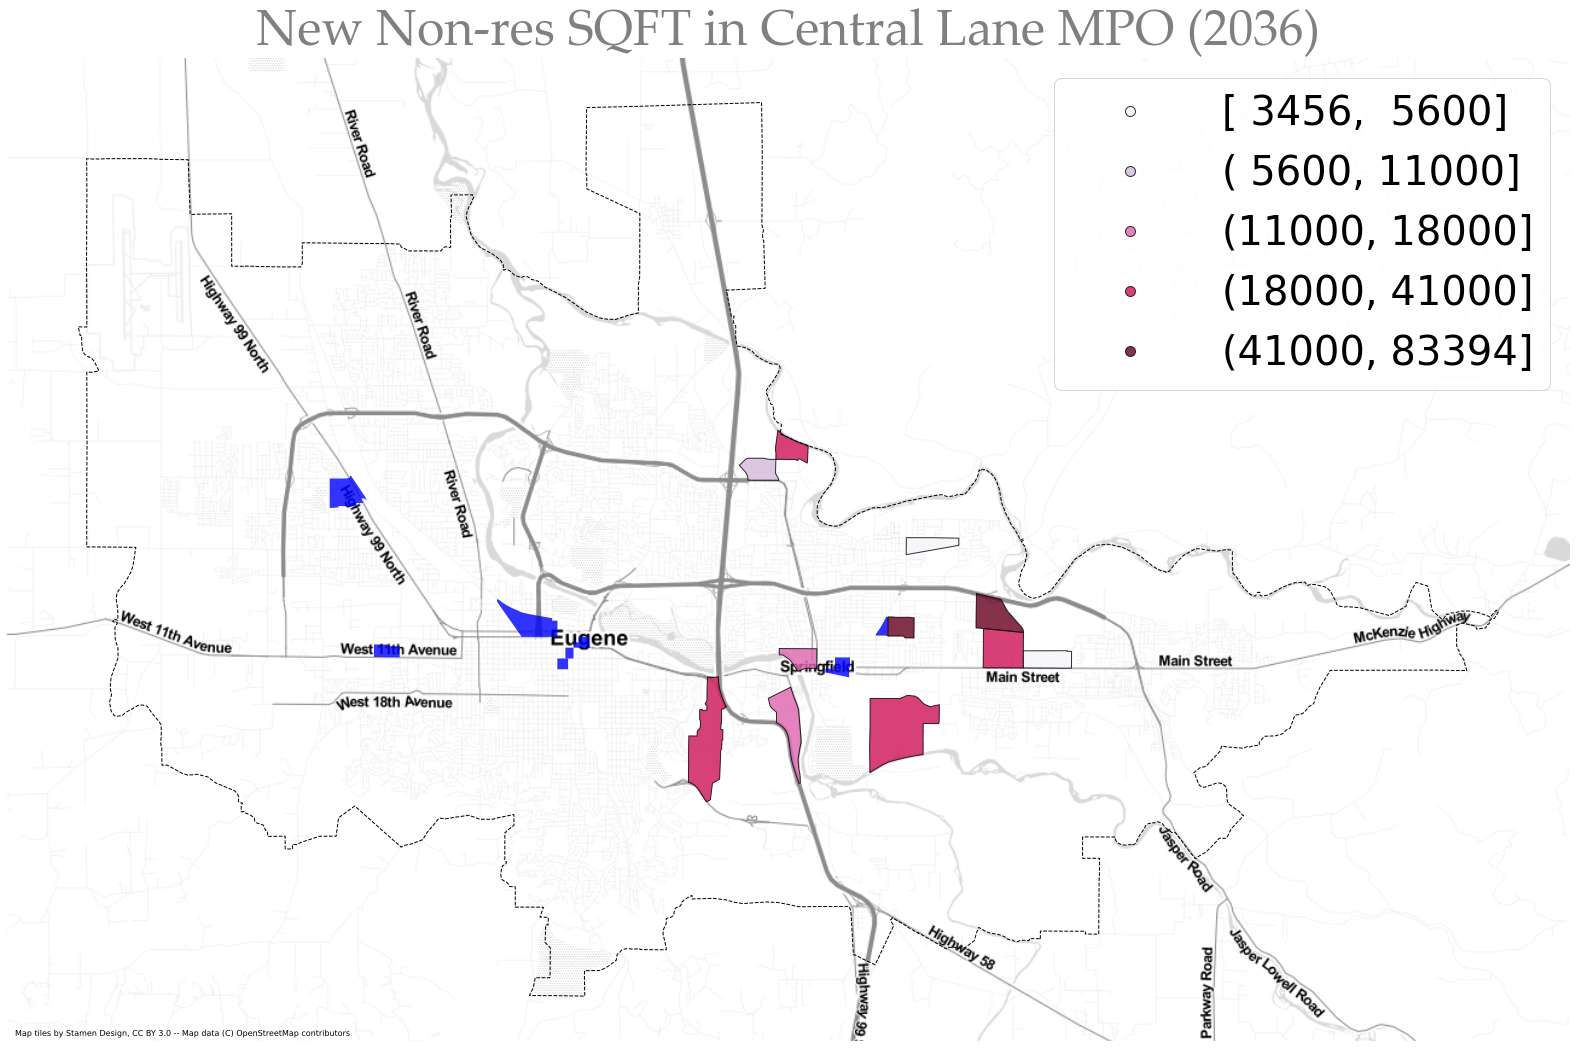

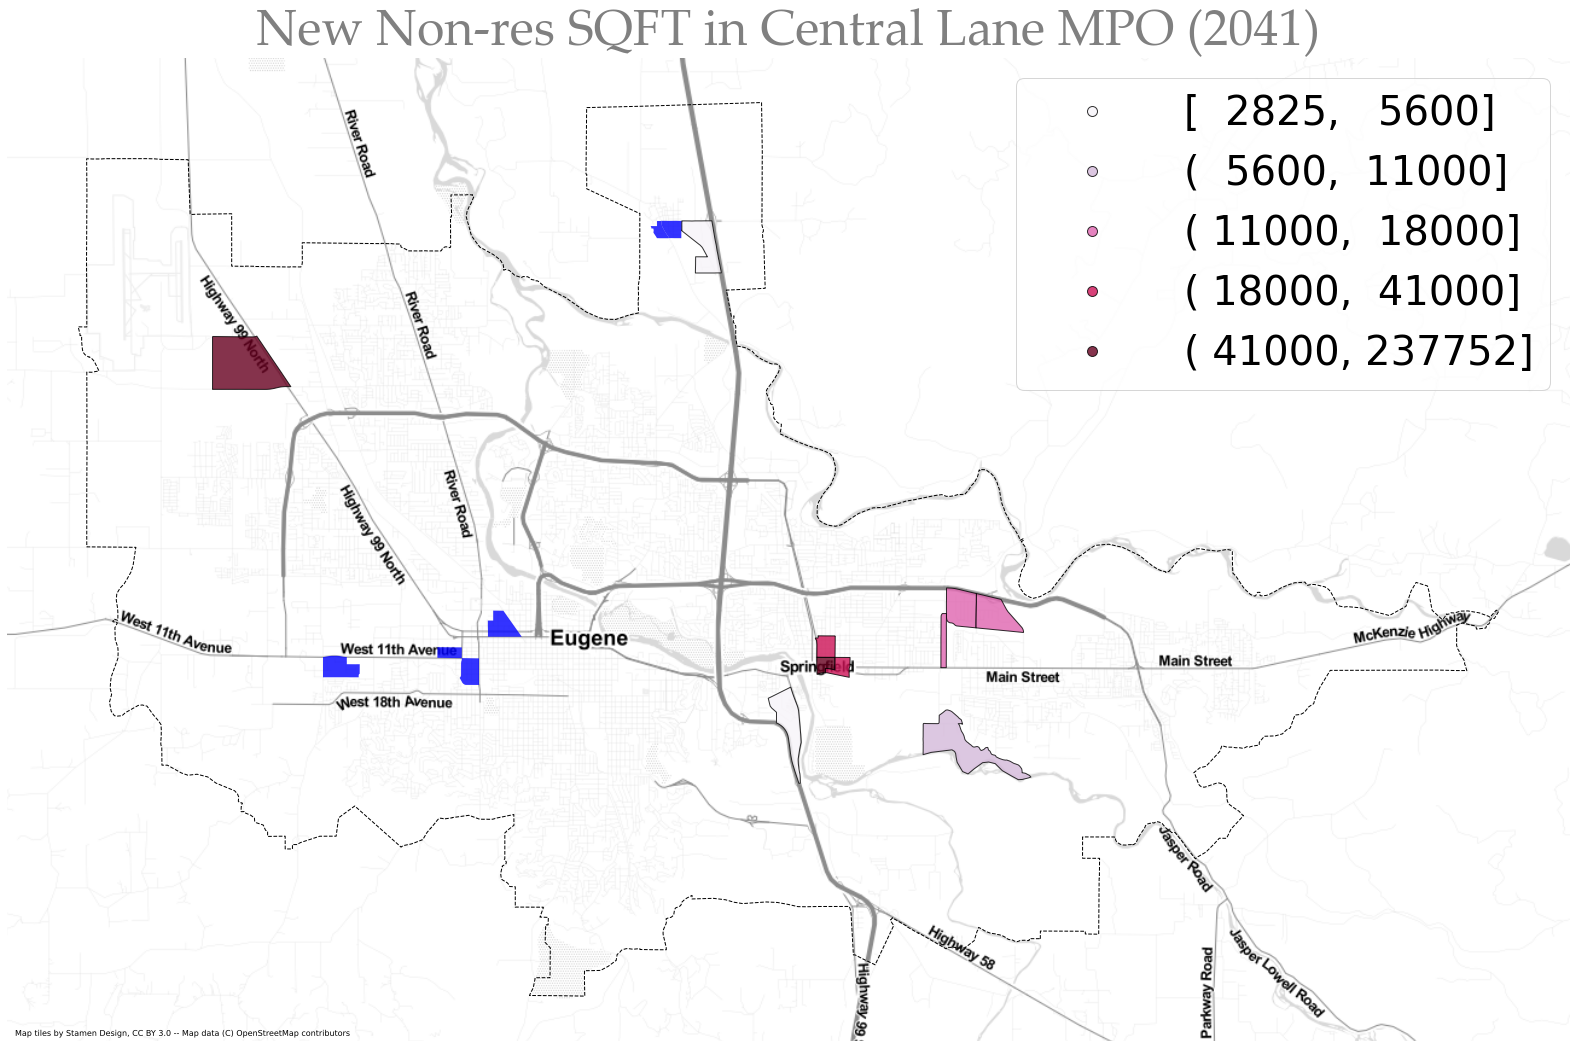

In [125]:
for yrbuilt in range(2021, 2046, 5):
    newDevTaz = gpd.read_file(os.path.join(path, "newDev_taz_" + str(yrbuilt) + ".shp"))
    newDevTaz = newDevTaz.to_crs(epsg=3857)
    # cax works separately with legend_kwds
    fig, ax = plt.subplots(figsize=(28, 24))
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.1)
    newDevTaz[newDevTaz[field]<0].plot(ax=ax, color='blue', alpha=.8)
    newDevTaz[newDevTaz[field]>0].plot(ax=ax, column=field, cmap='PuRd', edgecolor='k',
                                       scheme ='User_Defined', alpha=.8, #cax=cax,
                                       legend=True, legend_kwds={"fmt": "{:.0f}"},
                                      classification_kwds=dict(bins=bins))
    #, legend_kwds={'label': legendLabel,'orientation': "horizontal"})
    for legend_handle in ax.get_legend().legendHandles:  
        legend_handle._legmarker.set_markeredgewidth(1)
        legend_handle._legmarker.set_markeredgecolor('k')
    MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--')
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
    plt.title(fieldName + " in Central Lane MPO (" + str(yrbuilt) + ")", fontsize=50, fontname="Palatino Linotype", 
              color="grey", loc = 'center')
    ax.axis("off")
    plt.savefig(os.path.join(outpath, "new_" + outnm + "_" + str(yrbuilt) + ".png"), transparent=True, bbox_inches='tight')
    print("Saved image for " + str(yrbuilt) + "...")